In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Python Version**

In [2]:
!python --version

Python 3.10.13


# **GPU Checking**

In [4]:
!nvidia-smi

Mon May  6 12:37:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print(f"GPU: {device}")
else:
    print("No GPU available.")

GPU: Tesla T4


# **Importing Dependancies**

In [6]:
!pip install ultralytics==8.1.23

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [8]:
import torch
print(torch.version.cuda)
torch.cuda.is_available()

12.1


True

# **Train**

In [9]:
# !yolo task=segment mode=train model=/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/yolov9c-seg.pt data=/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/data.yaml  epochs=100  save=True  imgsz=640 batch=16

model = YOLO('/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/yolov9c-seg.pt')
results = model.train(data='/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/data.yaml', epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/yolov9c-seg.pt, data=/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=F

# **Train Result/Epoch**

In [ ]:
from tabulate import tabulate
import csv

csv_file_path = '/kaggle/working/runs/segment/train/results.csv'

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    data = list(csv_reader)

print(tabulate(data, headers=header, tablefmt='grid'))

# **Result Graph**

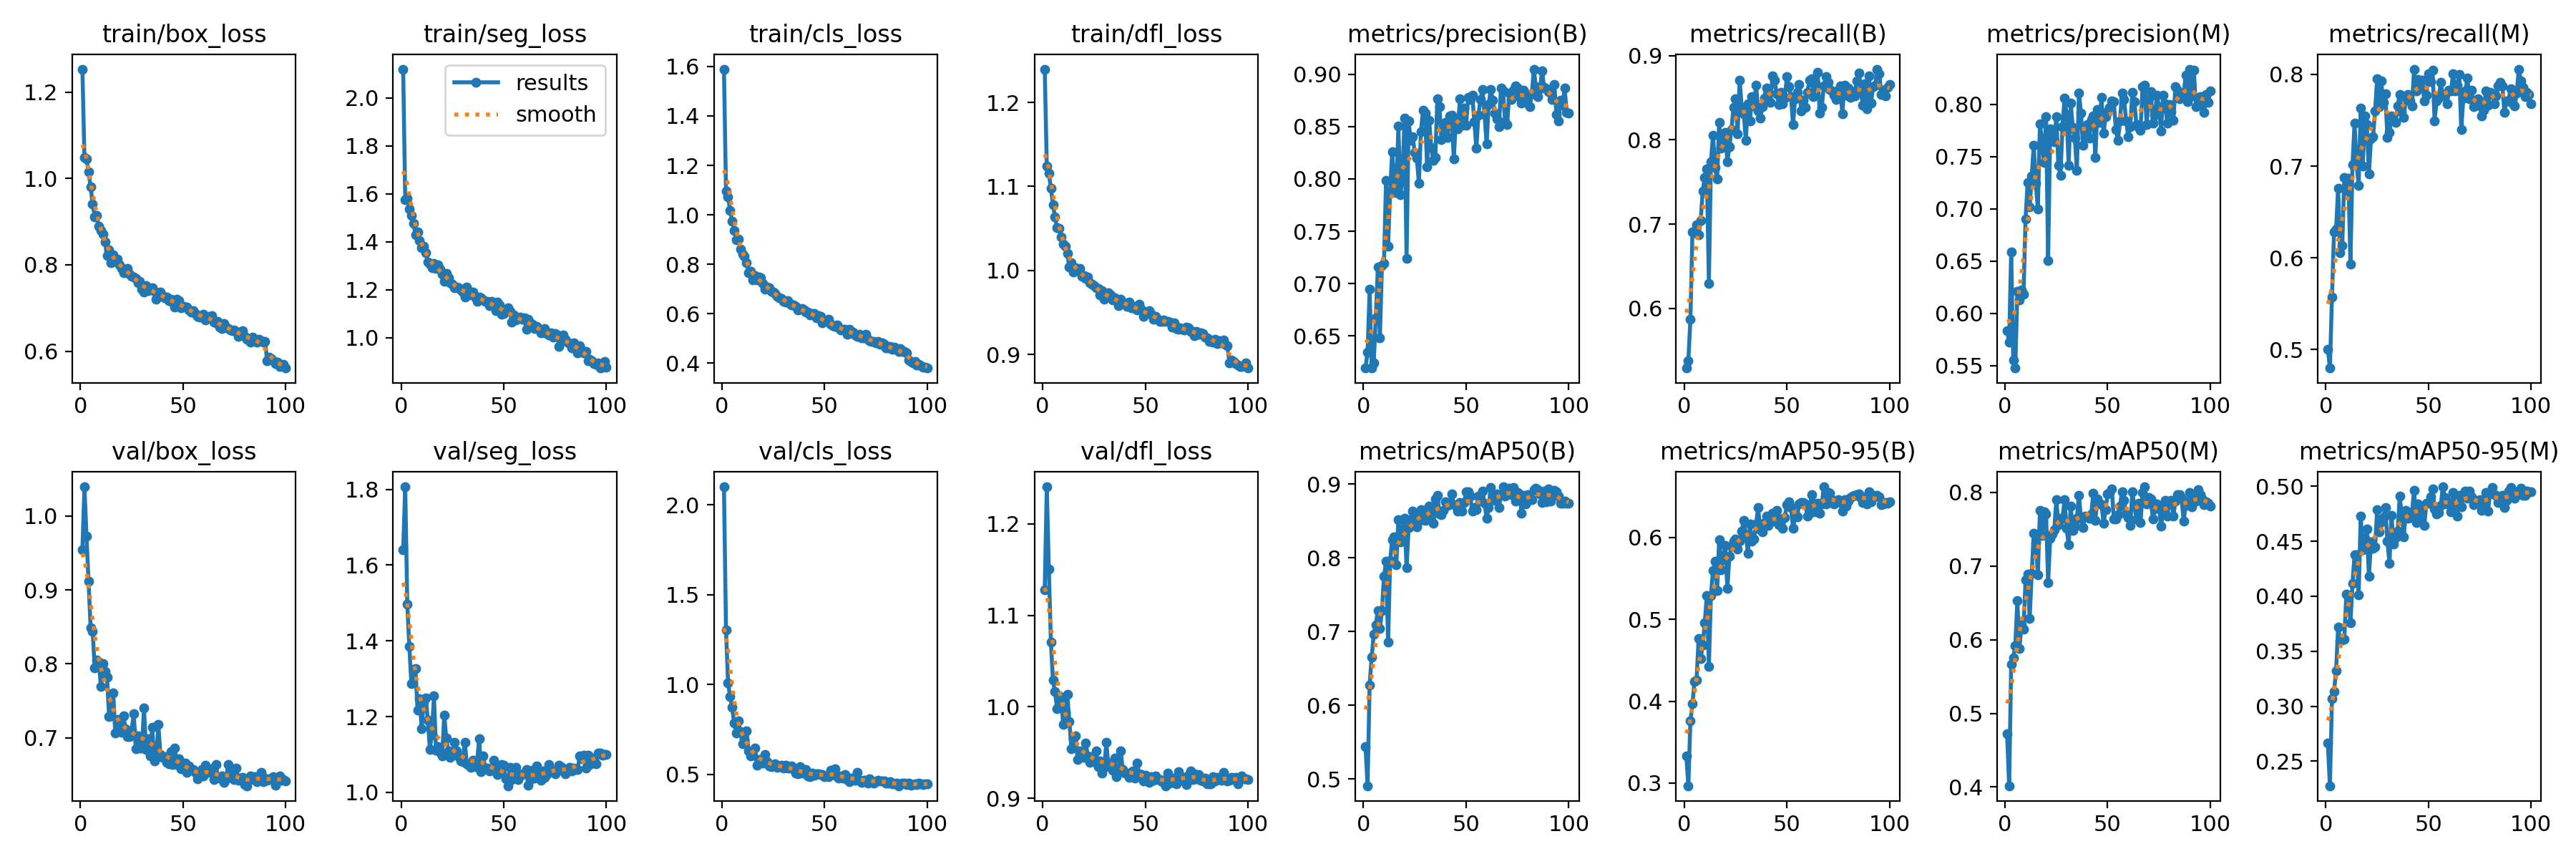

In [10]:
from IPython.display import display, Image

Image(filename="/kaggle/working/runs/segment/train/results.png", width=600)

# **Confusion Matrics**

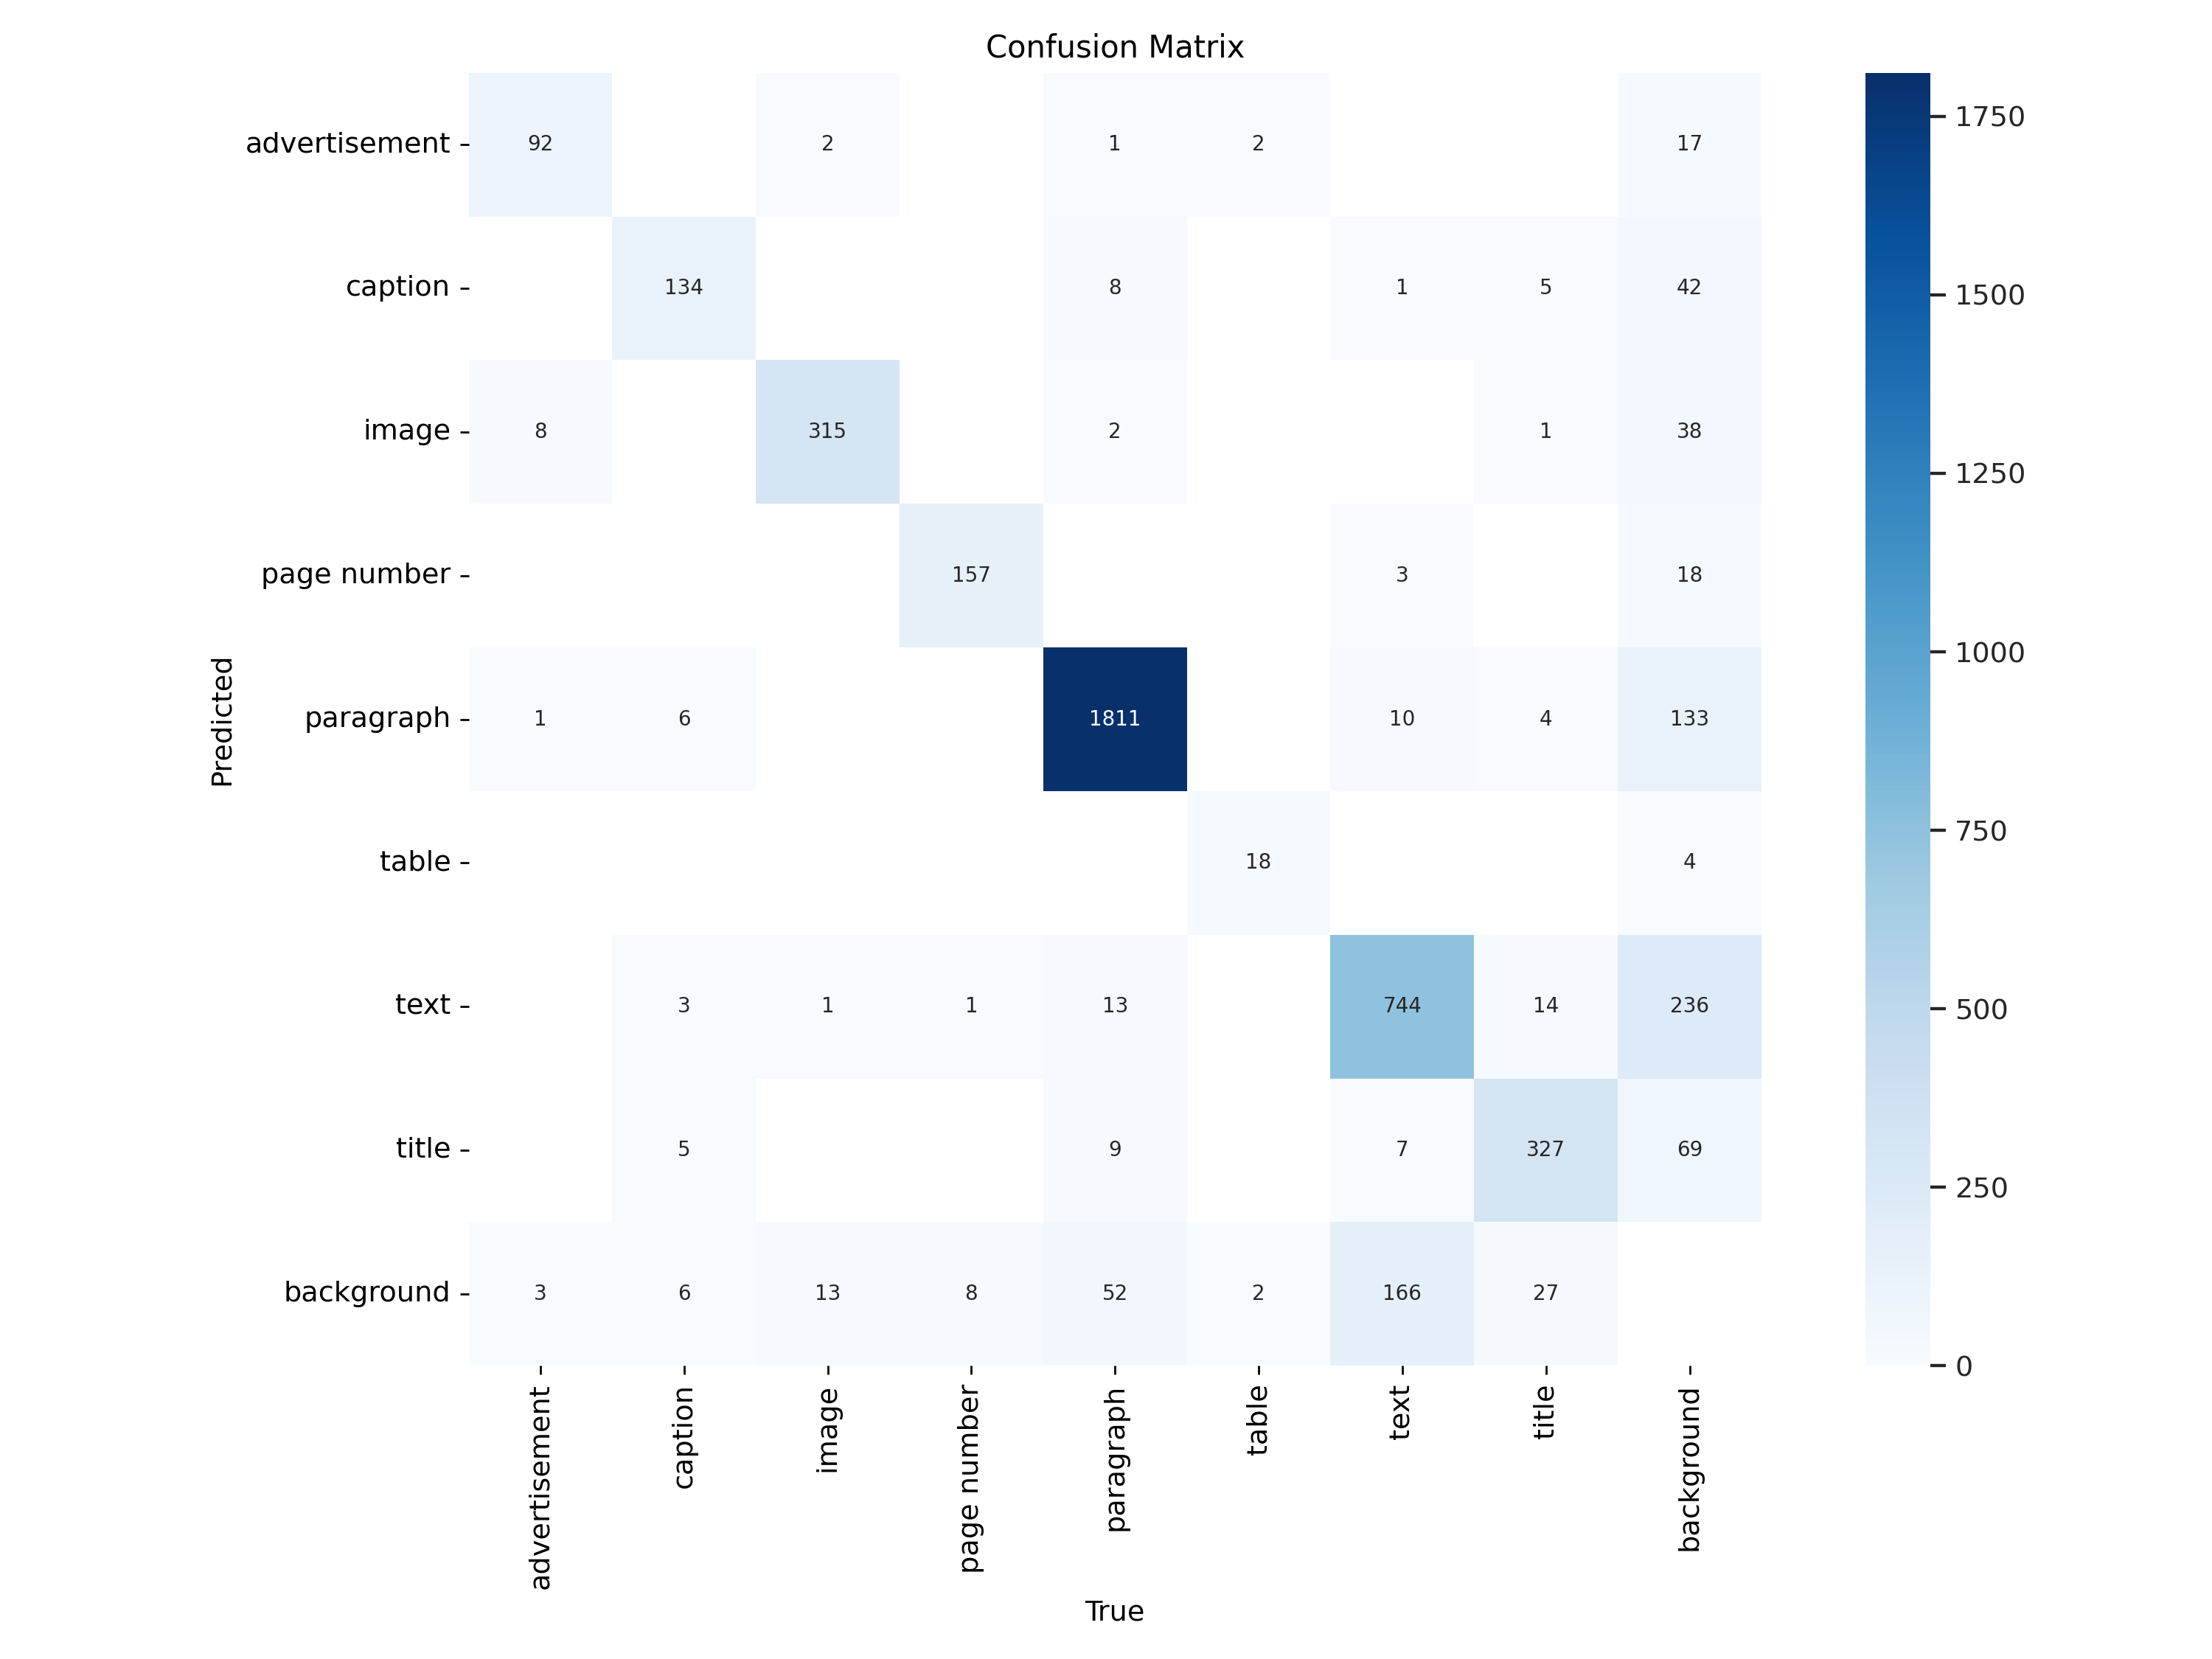

In [11]:
Image(filename="/kaggle/working/runs/segment/train/confusion_matrix.png", width=600)

# **F1 Score Curve**

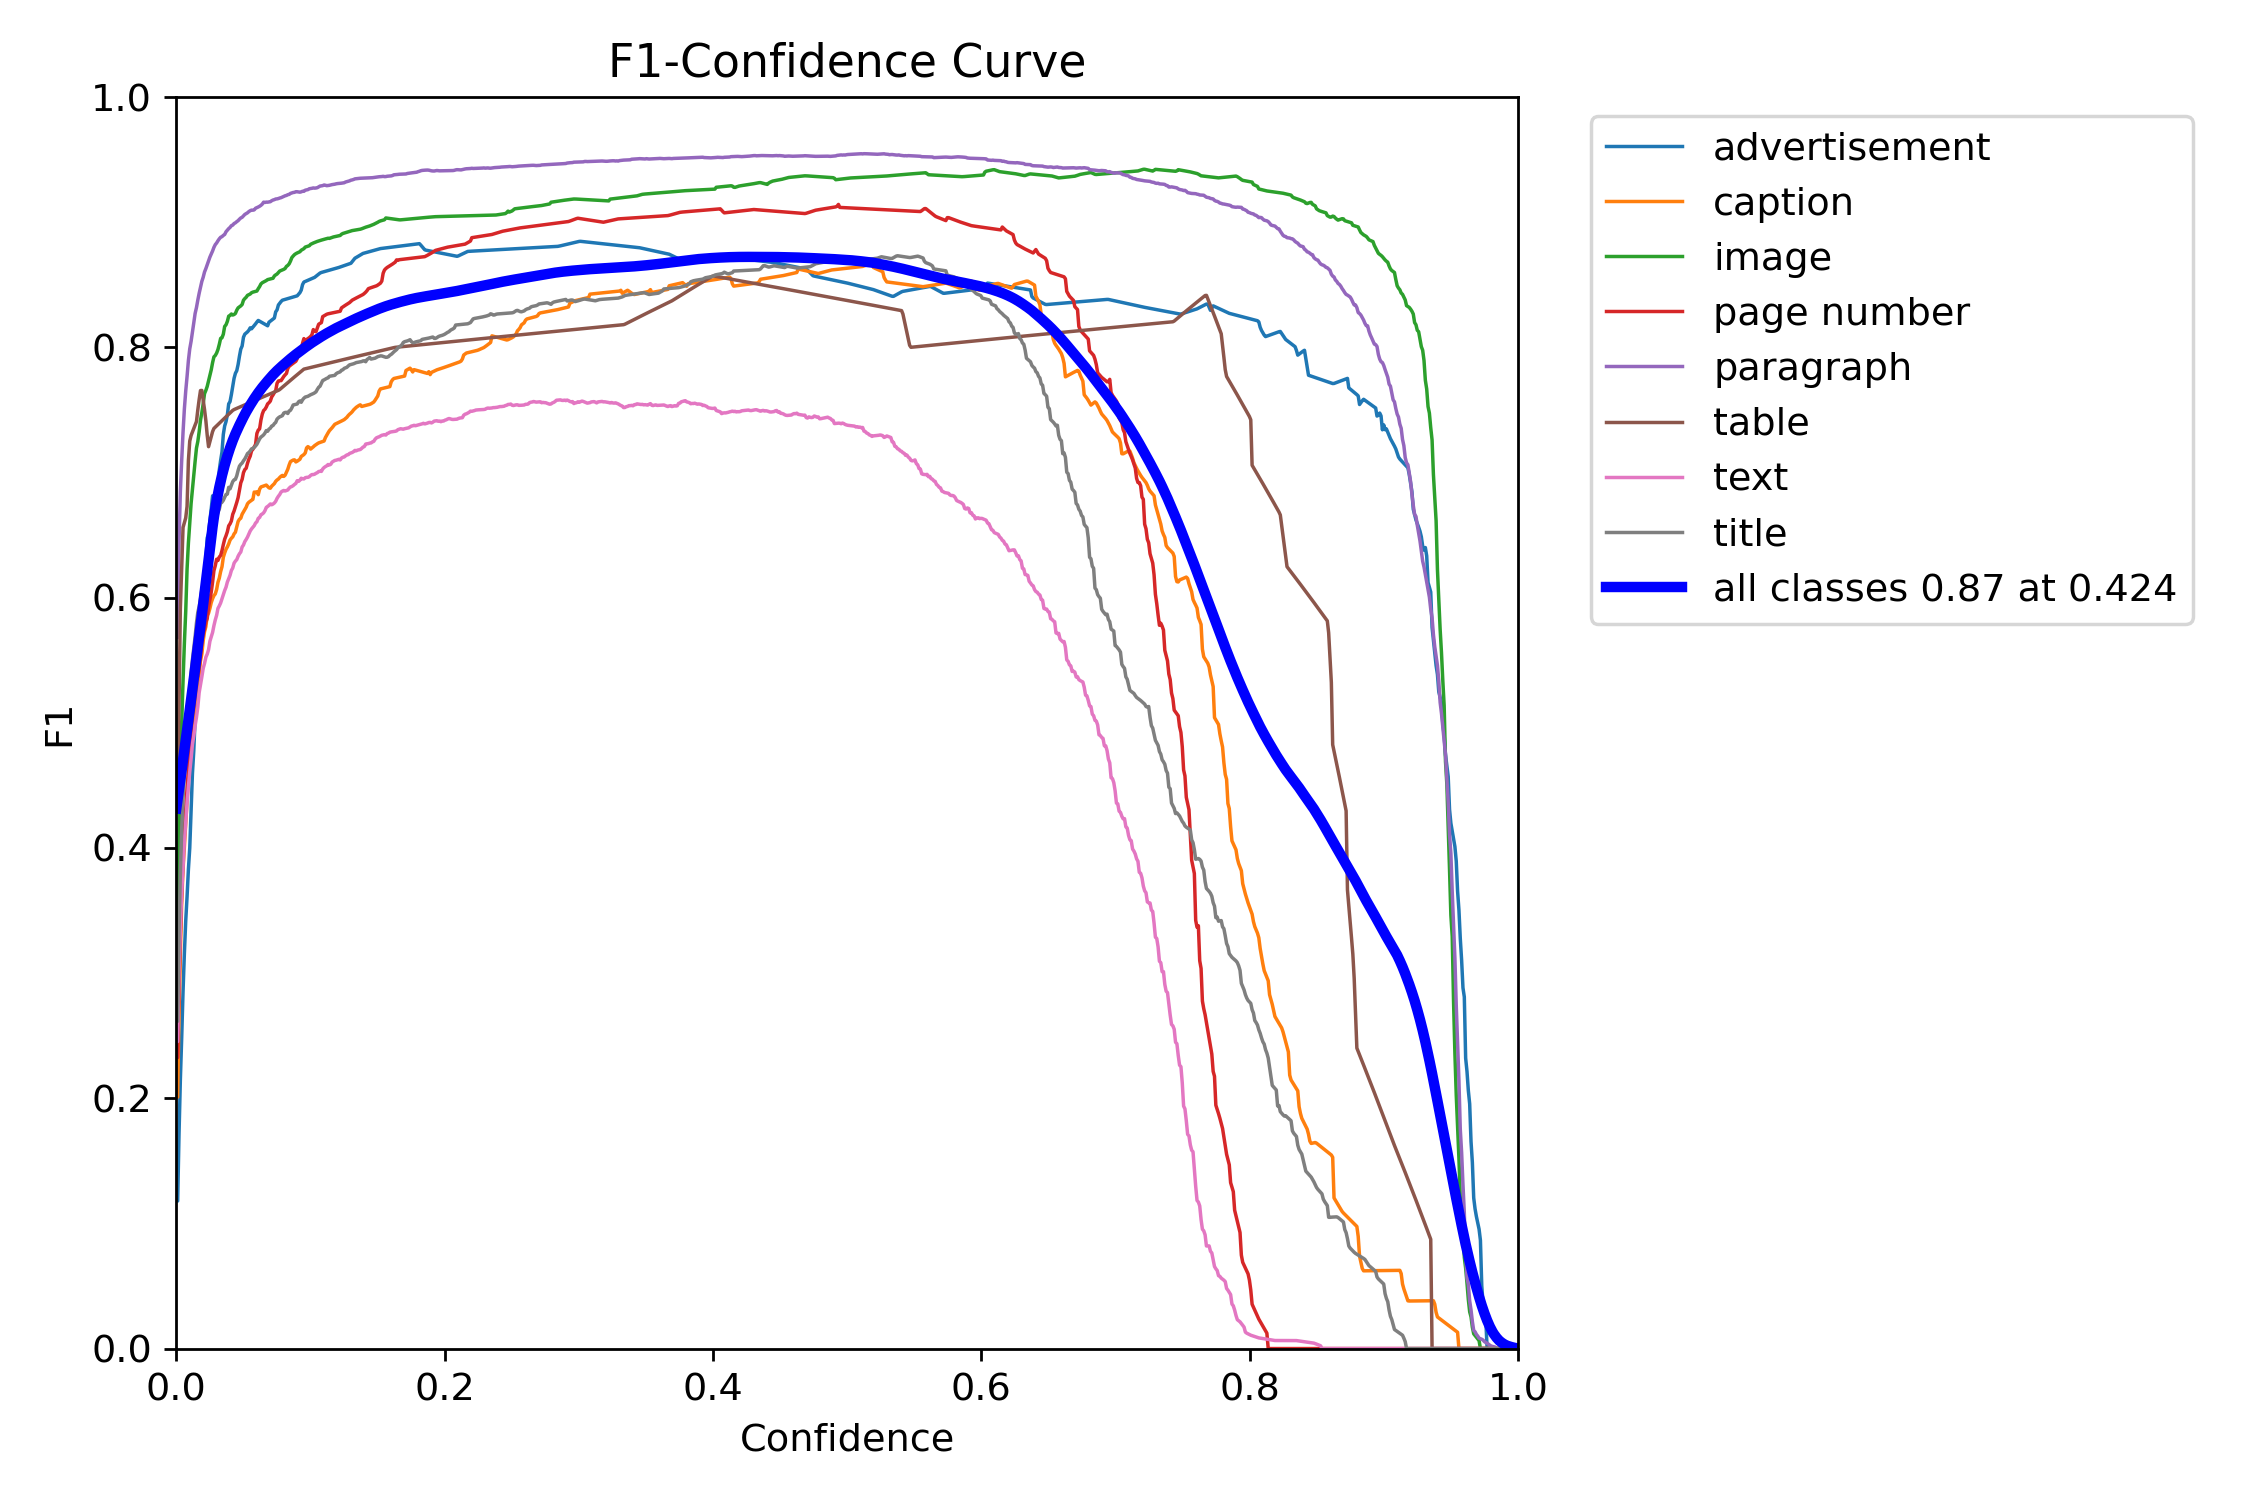

In [12]:
Image(filename="/kaggle/working/runs/segment/train/BoxF1_curve.png", width=600)

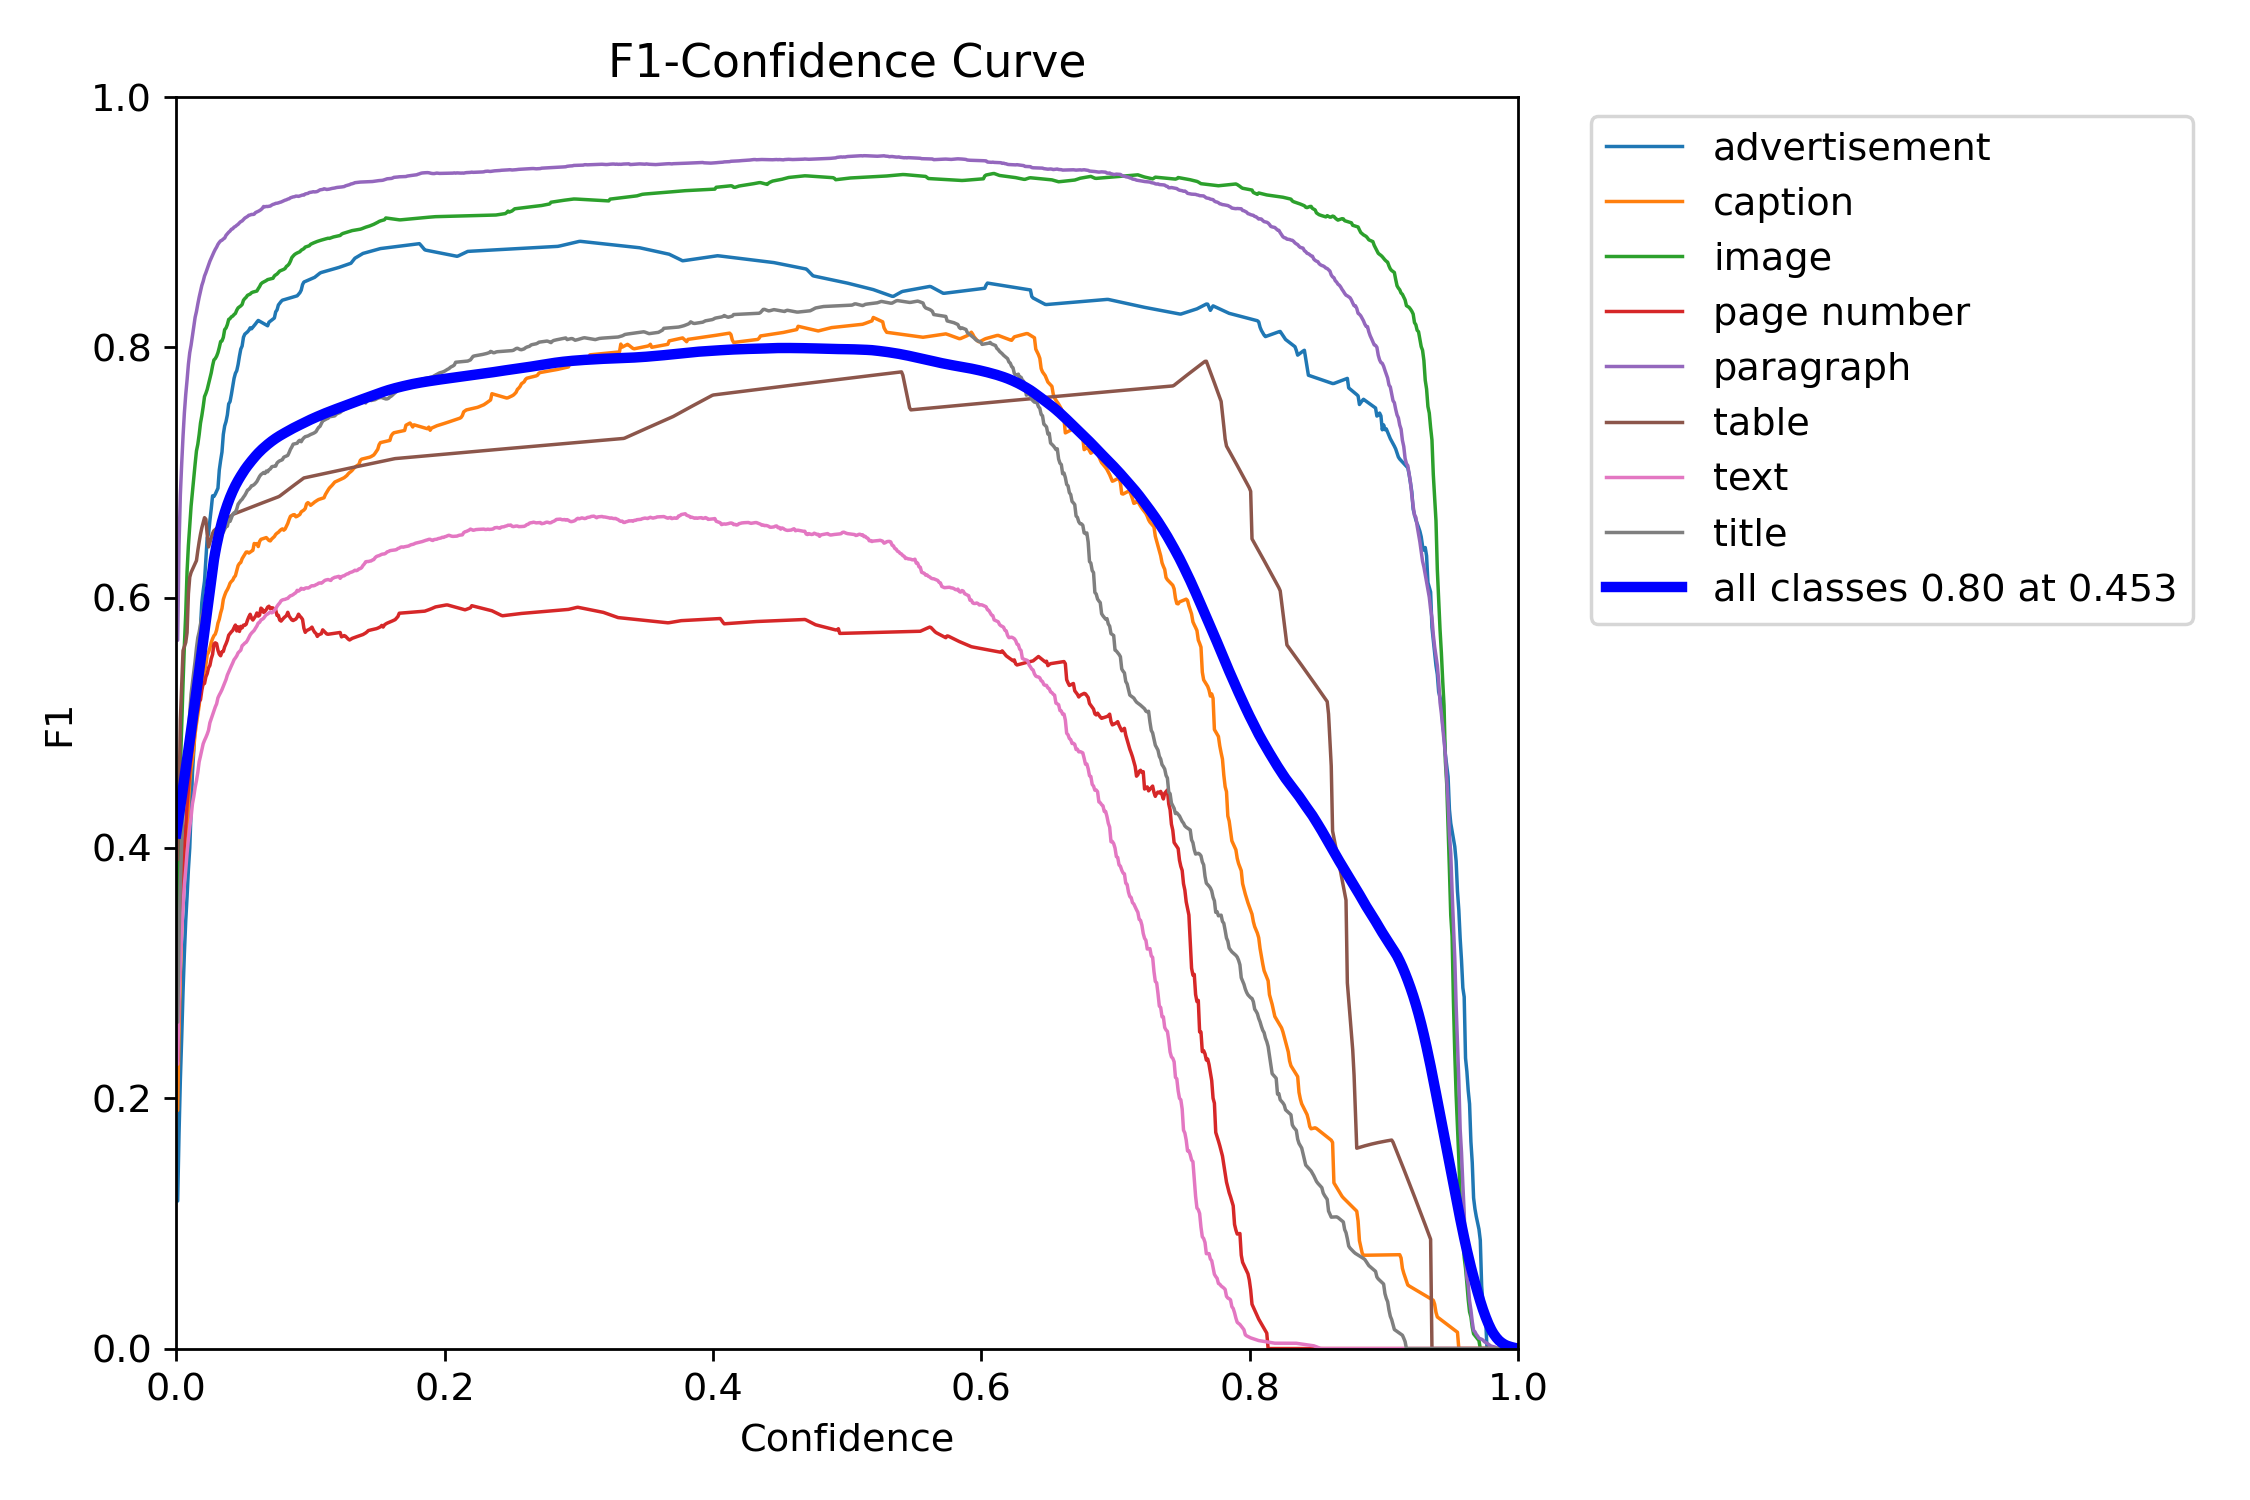

In [13]:
Image(filename="/kaggle/working/runs/segment/train/MaskF1_curve.png", width=600)

# **Precision Curve**

In [14]:
Image(filename="/kaggle/working/runs/segment/train/MaskP_curve.png", width=600)

In [15]:
Image(filename="/kaggle/working/runs/segment/train/BoxP_curve.png", width=600)

# **Recall Curve**

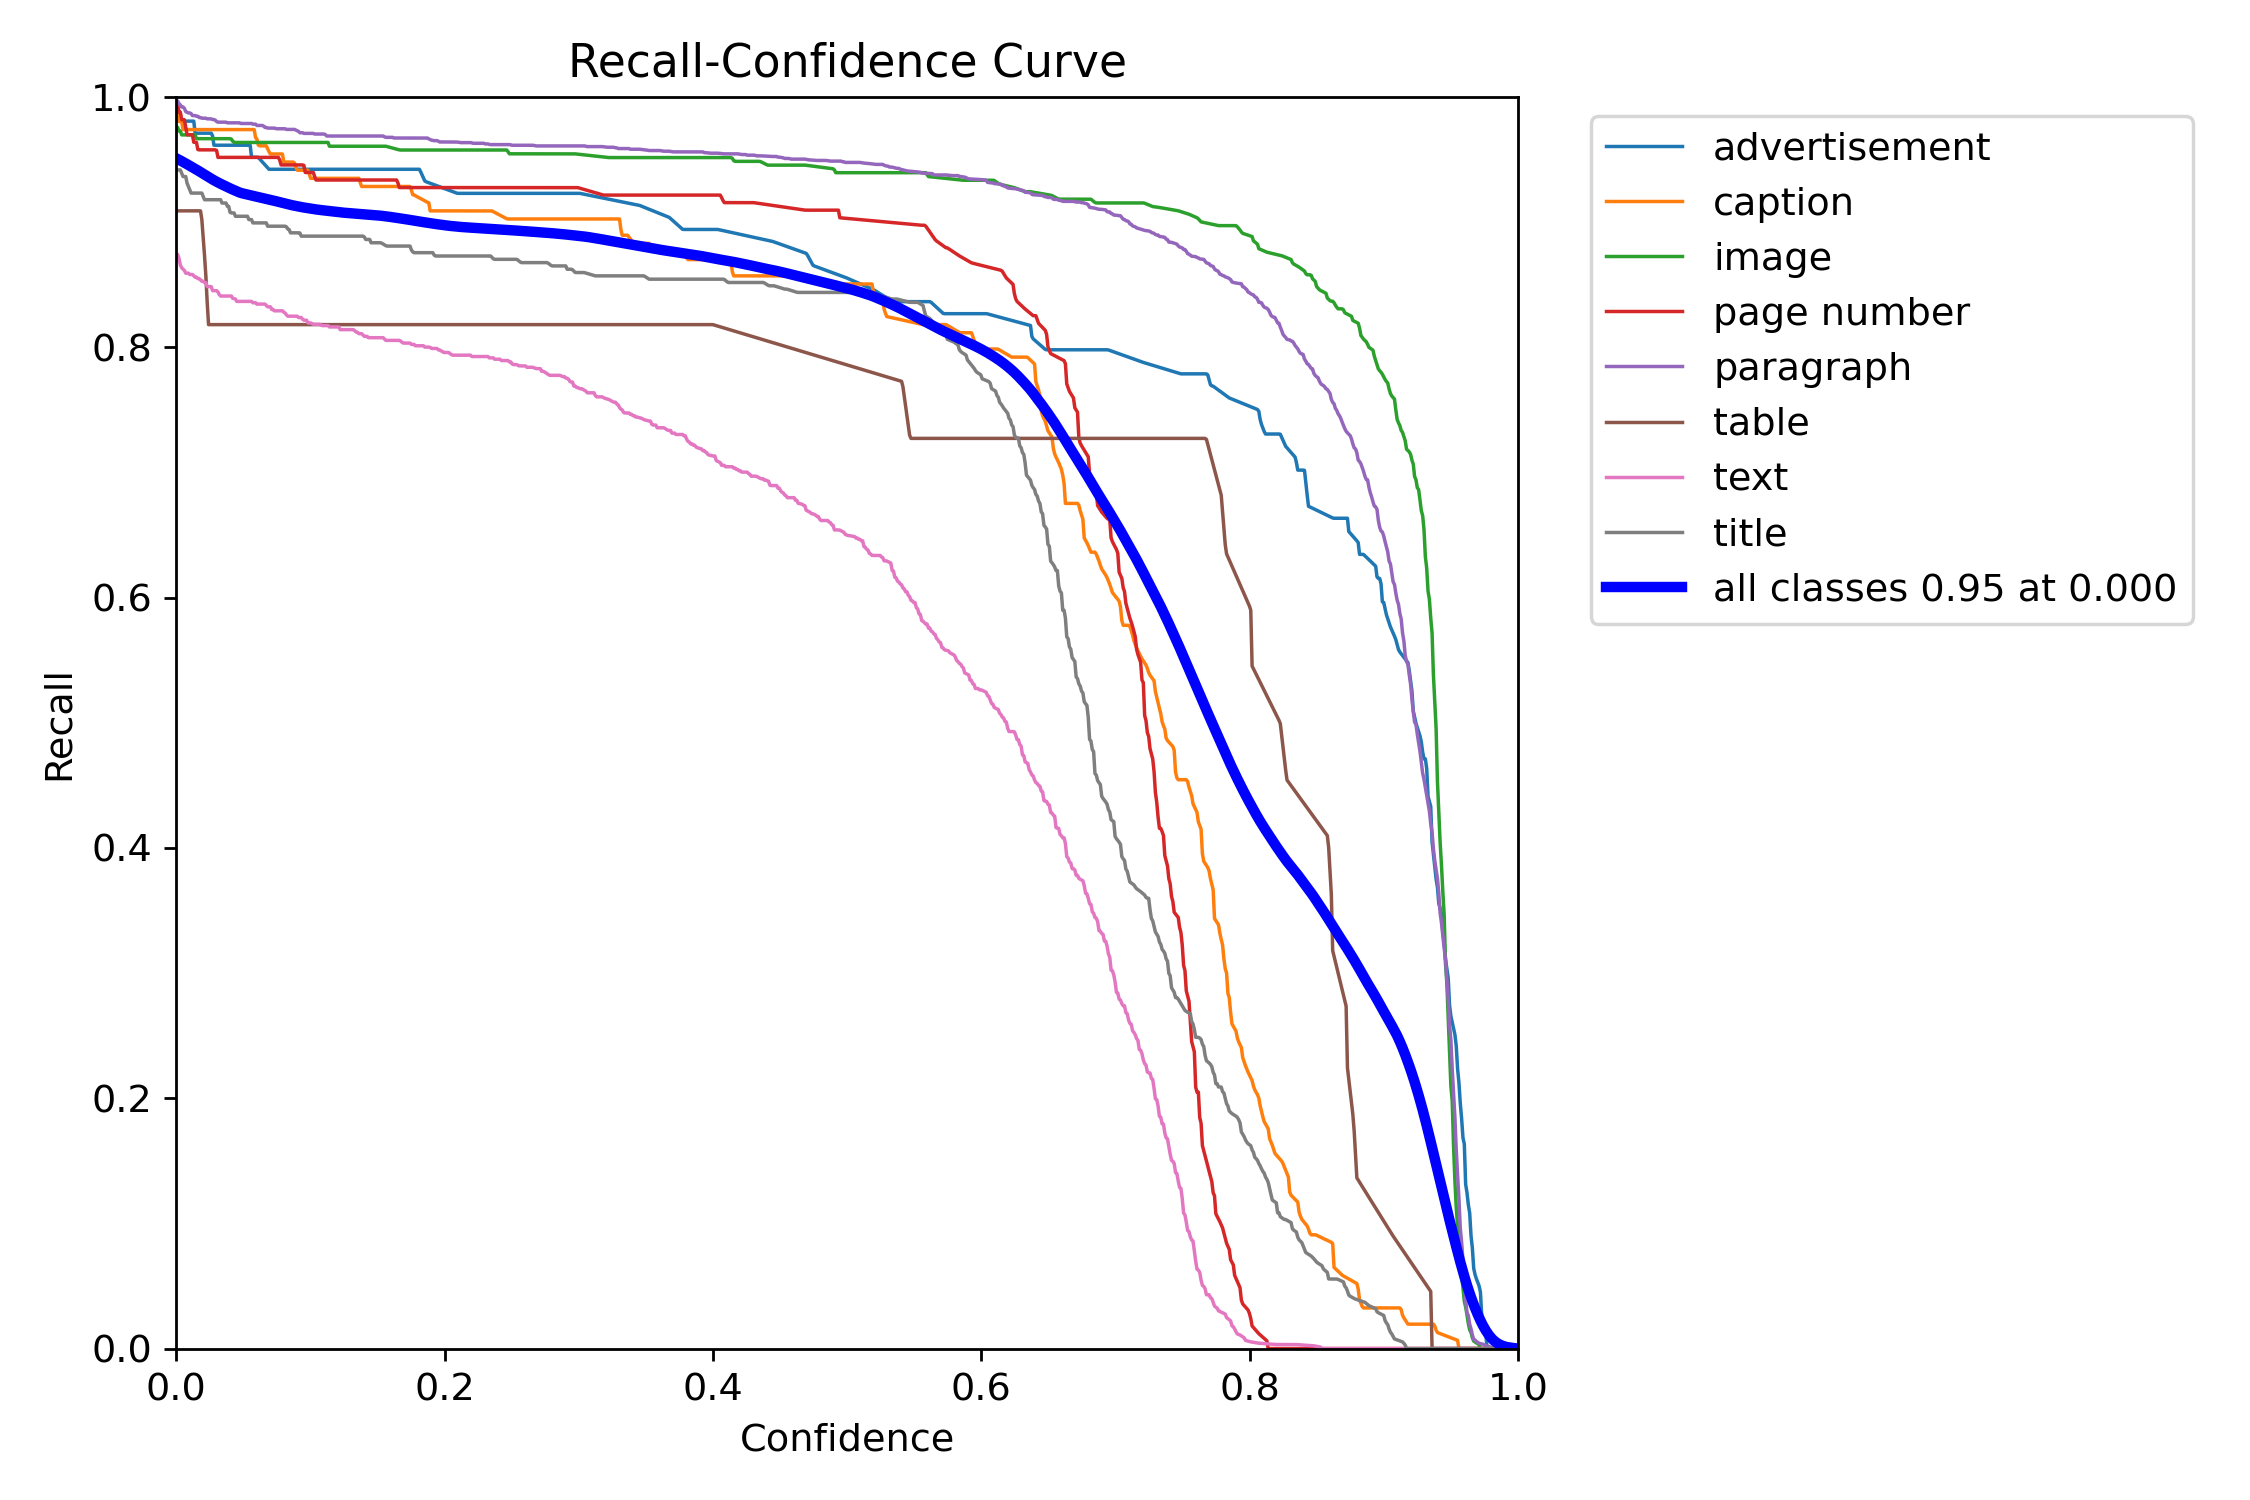

In [16]:
Image(filename="/kaggle/working/runs/segment/train/BoxR_curve.png", width=600)

In [17]:
Image(filename="/kaggle/working/runs/segment/train/MaskR_curve.png", width=600)

# **Precision-Recall Curve**

In [18]:
Image(filename="/kaggle/working/runs/segment/train/BoxPR_curve.png", width=600)

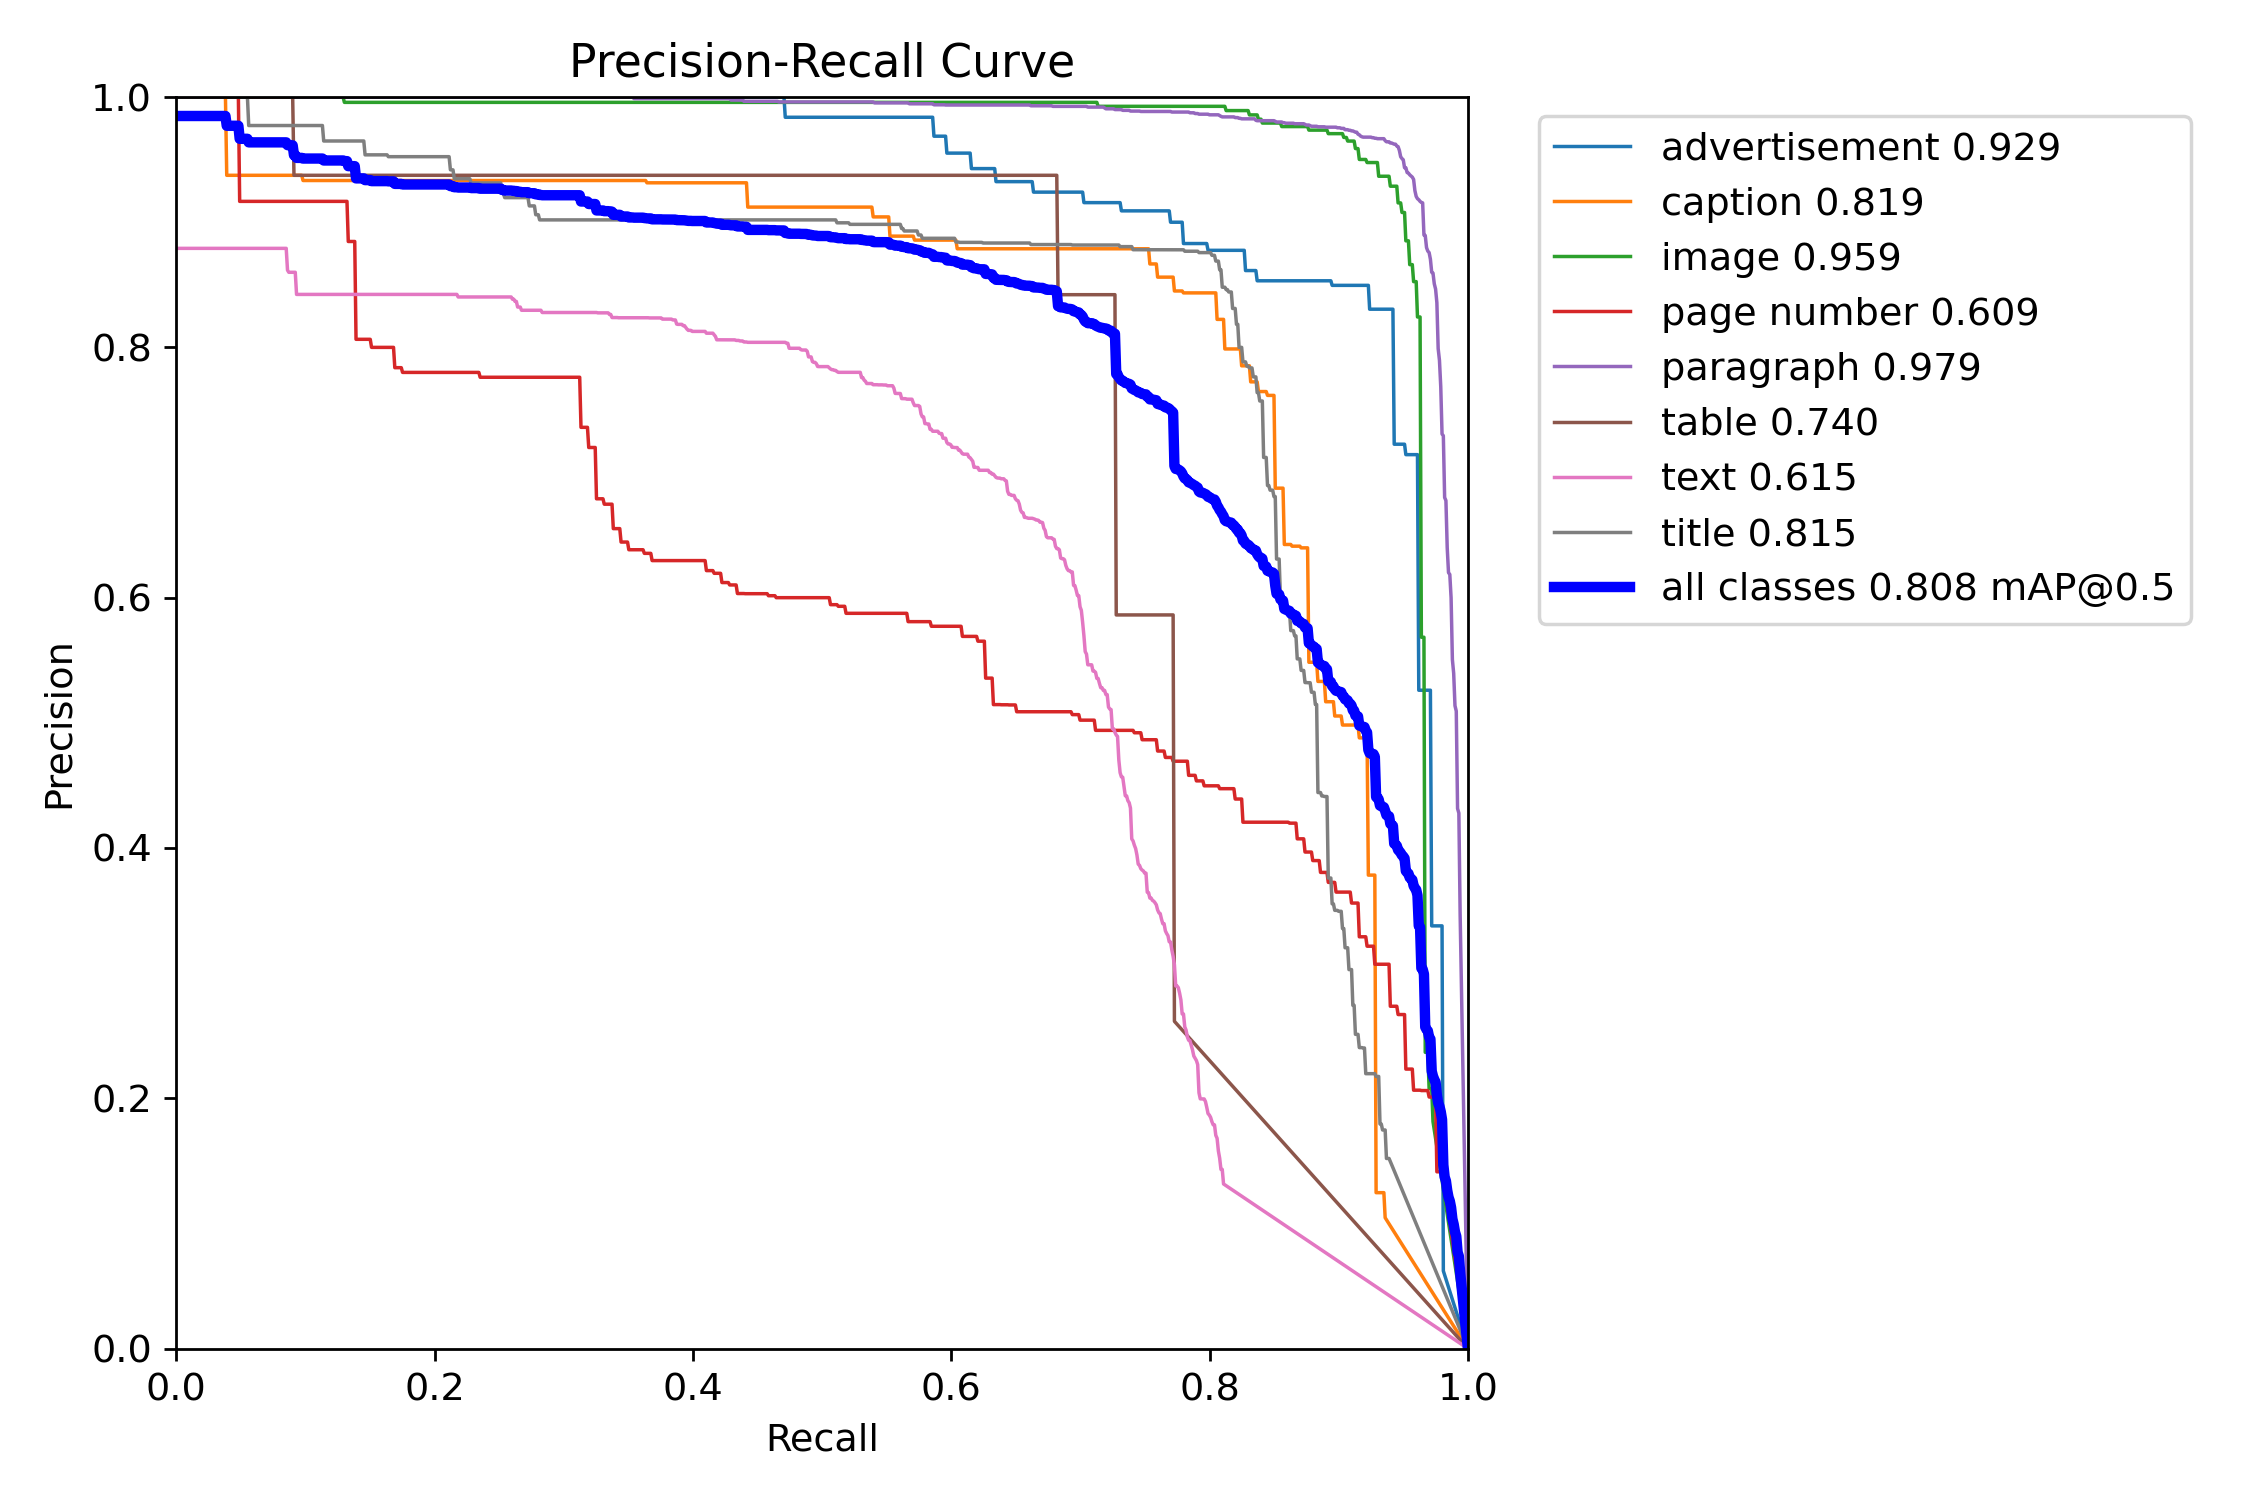

In [19]:
Image(filename="/kaggle/working/runs/segment/train/MaskPR_curve.png", width=600)

# **Test**

In [38]:
model = YOLO('/kaggle/working/runs/segment/train2/weights/best.pt')

source = '/kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/test/images'

model.predict(source, save=True, imgsz=640, conf=0.5)


image 1/321 /kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/test/images/0a08c243-e357-4dcf-90bc-296cf1a1fe32_png.rf.719527b4e3cb452db4ad13137bb3785d.jpg: 640x640 1 caption, 1 image, 1 page number, 5 paragraphs, 65.1ms
image 2/321 /kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/test/images/0de9e4bf-f822-4659-8b01-1ea9f936b0d1_png.rf.5878739612a40456c125ea4dcc45162b.jpg: 640x640 1 image, 16 paragraphs, 1 text, 47.8ms
image 3/321 /kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/test/images/0f1d06c9-fb39-4e0b-ac43-deea887d9604_png.rf.d1fb84d25cdaa7b34d80bd3028a88d4f.jpg: 640x640 2 advertisements, 2 images, 3 paragraphs, 45.6ms
image 4/321 /kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/test/images/17664f4b-fbbe-4c8b-b626-046021a6d0a4-at800_jpg.rf.ebe4938d838a14c64d95c6c9a9be914f.jpg: 640x640 1 page number, 16 paragraphs, 1 table, 35 texts, 1 title, 38.1ms
image 5/321 /kaggle/input/fydp-yolov9/FYDP.v13-fydp_yolov8.yolov9/test/images/1b4c4b38-3950-419c-a6b9-0df16e1e9f

OutOfMemoryError: CUDA out of memory. Tried to allocate 194.00 MiB. GPU 0 has a total capacty of 14.75 GiB of which 119.06 MiB is free. Process 2113 has 14.63 GiB memory in use. Of the allocated memory 12.49 GiB is allocated by PyTorch, and 1.88 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

# **Making Zip & Download Prediction**

In [40]:
import shutil
import zipfile

source_folder = '/kaggle/working/runs/segment/predict'
zip_filename = '/kaggle/working/runs/segment/predict'
shutil.make_archive(zip_filename, 'zip', source_folder)

'/kaggle/working/runs/segment/predict.zip'

# **Sample Test Images**

In [32]:
import cv2
import matplotlib.pyplot as plt

In [39]:

image = cv2.imread('/kaggle/working/runs/segment/predict/a3250320-2b28-4c4d-9fd6-08c4c46bba7b-at800_jpg.rf.3a56a944af0af0622f6a7efdf2a228e3.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

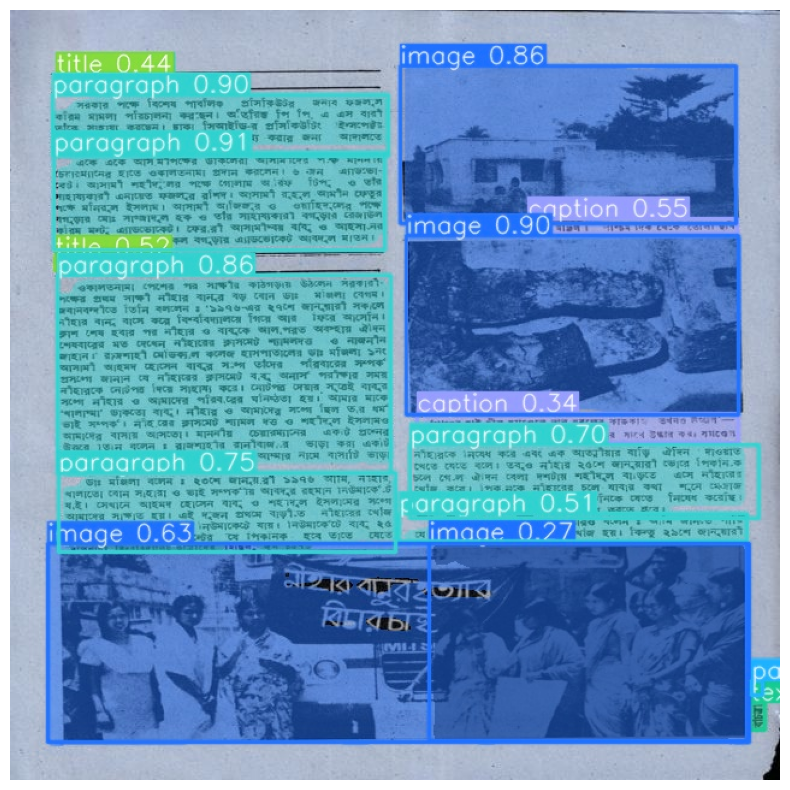

In [26]:
image = cv2.imread('/kaggle/working/runs/segment/predict2/b0de3a8a-94f0-4419-bbbc-22ff3dbd2c87-at800_jpg.rf.ca89a5e700bb4708b167d468ee782b8c.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

In [27]:
image = cv2.imread('/kaggle/working/runs/segment/predict2/a4873208-83c8-4b6d-a3f7-2551ccc429c9-at1000_jpg.rf.97302c24416e051235dbbc343946a28a.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

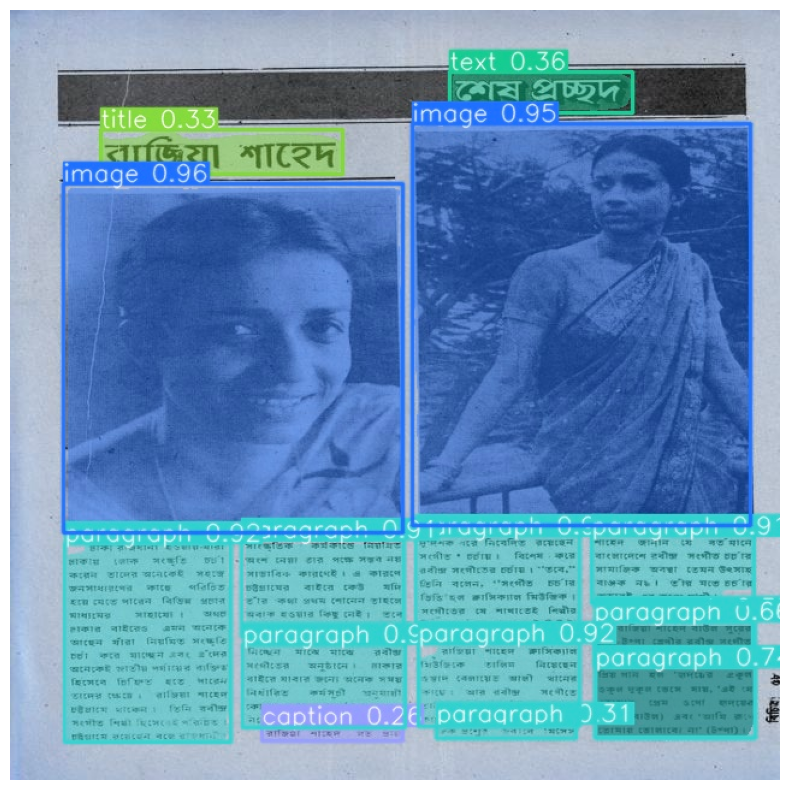

In [28]:
image = cv2.imread('/kaggle/working/runs/segment/predict2/a69bd36f-0cb9-40cc-88c0-4d03d4964b60-at800_jpg.rf.2ae770951a46d6866e2691e99d44f615.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  
plt.show()

# **Working Directory Cleaner(If needed)**

In [ ]:
#!rm -rf /kaggle/working/*